# Visualizing Search Algorithms on Graphs

Providing comprehensive Python code for visualizing graph search
algorithms with multiple approaches and interactive features.

## Basic Graph Search Visualization


Creating static comparison...


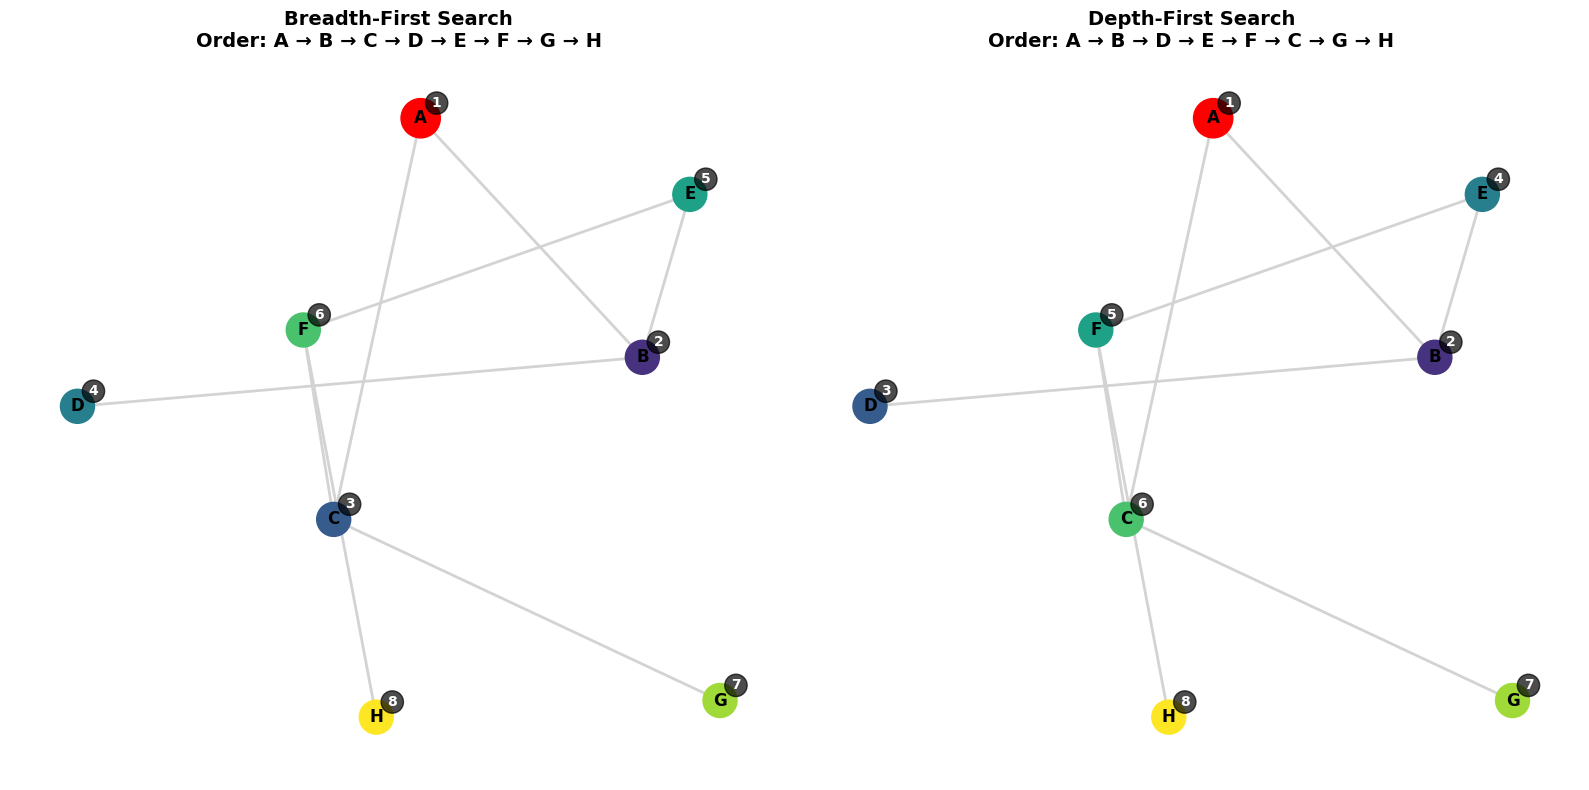

BFS Order: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
DFS Order: ['A', 'B', 'D', 'E', 'F', 'C', 'G', 'H']

Creating animated visualization...

Visualizing shortest path...


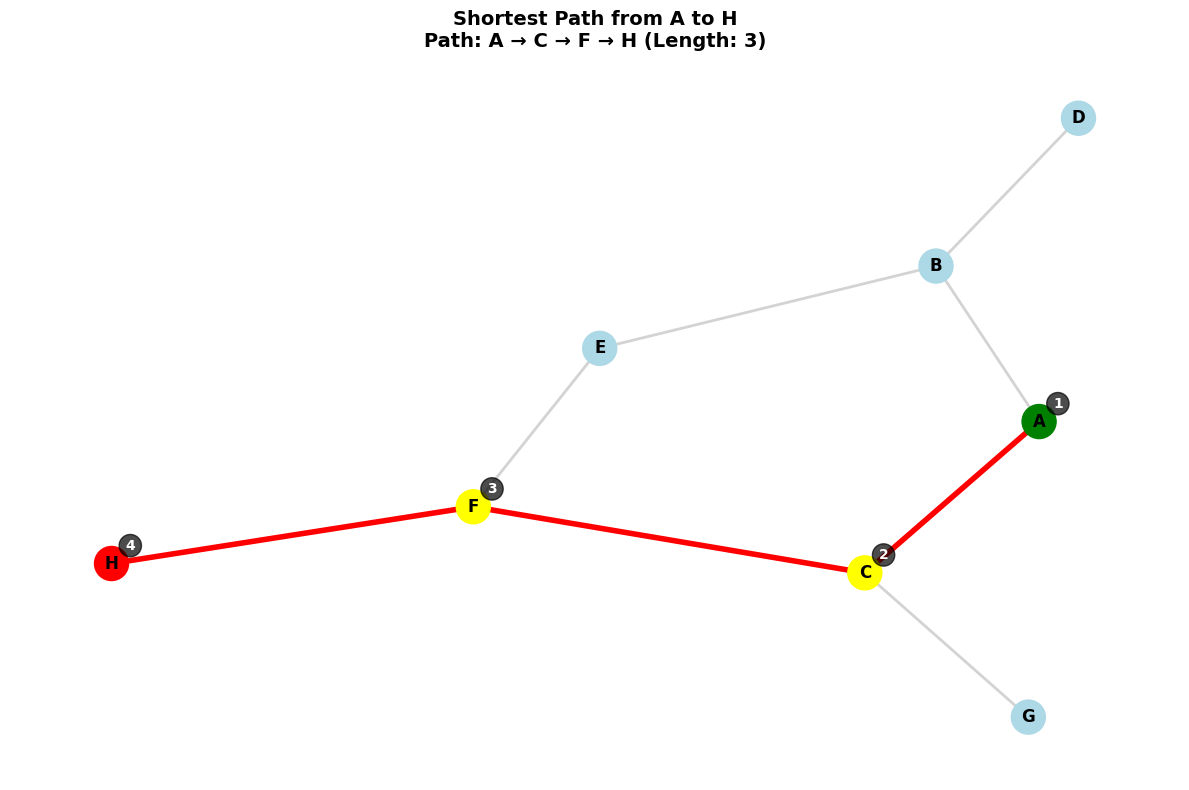

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import deque
import time
from matplotlib.animation import FuncAnimation

class GraphSearchVisualizer:
    def __init__(self, graph_dict):
        """
        Initialize the graph visualizer

        Args:
            graph_dict: Dictionary representing adjacency list
        """
        self.graph_dict = graph_dict
        self.G = nx.Graph()

        # Build NetworkX graph
        for vertex, neighbors in graph_dict.items():
            for neighbor in neighbors:
                self.G.add_edge(vertex, neighbor)

        # Set consistent layout
        self.pos = nx.spring_layout(self.G, seed=42, k=2, iterations=50)

    def bfs_with_steps(self, start):
        """BFS that returns step-by-step progression"""
        visited = set()
        queue = deque([start])
        steps = []

        visited.add(start)
        steps.append({
            'current': start,
            'visited': visited.copy(),
            'queue': list(queue),
            'action': f'Start at {start}'
        })

        while queue:
            vertex = queue.popleft()

            for neighbor in self.graph_dict.get(vertex, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    steps.append({
                        'current': neighbor,
                        'visited': visited.copy(),
                        'queue': list(queue),
                        'action': f'Discover {neighbor} from {vertex}'
                    })

        return steps

    def dfs_with_steps(self, start):
        """DFS that returns step-by-step progression"""
        visited = set()
        stack = [start]
        steps = []

        steps.append({
            'current': start,
            'visited': set(),
            'stack': [start],
            'action': f'Start at {start}'
        })

        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                steps.append({
                    'current': vertex,
                    'visited': visited.copy(),
                    'stack': stack.copy(),
                    'action': f'Visit {vertex}'
                })

                # Add neighbors in reverse order
                neighbors = list(self.graph_dict.get(vertex, []))
                for neighbor in reversed(neighbors):
                    if neighbor not in visited:
                        stack.append(neighbor)
                        steps.append({
                            'current': vertex,
                            'visited': visited.copy(),
                            'stack': stack.copy(),
                            'action': f'Add {neighbor} to stack'
                        })

        return steps

    def visualize_static_comparison(self, start):
        """Create side-by-side comparison of BFS and DFS"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        # BFS visualization
        bfs_steps = self.bfs_with_steps(start)
        bfs_order = [step['current'] for step in bfs_steps if step['current'] not in
                    [s['current'] for s in bfs_steps[:bfs_steps.index(step)]]]

        # DFS visualization
        dfs_steps = self.dfs_with_steps(start)
        dfs_order = []
        for step in dfs_steps:
            if 'Visit' in step['action'] and step['current'] not in dfs_order:
                dfs_order.append(step['current'])

        # Draw BFS
        self._draw_search_result(ax1, bfs_order, "Breadth-First Search", start)

        # Draw DFS
        self._draw_search_result(ax2, dfs_order, "Depth-First Search", start)

        plt.tight_layout()
        plt.show()

        return bfs_order, dfs_order

    def _draw_search_result(self, ax, order, title, start):
        """Helper method to draw search results"""
        # Draw edges
        nx.draw_networkx_edges(self.G, self.pos, ax=ax, edge_color='lightgray', width=2)

        # Color nodes based on visit order
        node_colors = []
        node_sizes = []

        for node in self.G.nodes():
            if node == start:
                node_colors.append('red')
                node_sizes.append(800)
            elif node in order:
                # Gradient from blue to green based on visit order
                intensity = order.index(node) / (len(order) - 1) if len(order) > 1 else 0
                color = plt.cm.viridis(intensity)
                node_colors.append(color)
                node_sizes.append(600)
            else:
                node_colors.append('lightgray')
                node_sizes.append(400)

        # Draw nodes
        nx.draw_networkx_nodes(self.G, self.pos, ax=ax,
                              node_color=node_colors, node_size=node_sizes)

        # Draw labels
        nx.draw_networkx_labels(self.G, self.pos, ax=ax, font_size=12, font_weight='bold')

        # Add visit order numbers
        for i, vertex in enumerate(order):
            x, y = self.pos[vertex]
            ax.annotate(f'{i+1}', (x, y), xytext=(8, 8), textcoords='offset points',
                       fontsize=10, color='white', weight='bold',
                       bbox=dict(boxstyle='circle', facecolor='black', alpha=0.7))

        ax.set_title(f'{title}\nOrder: {" → ".join(order)}', fontsize=14, fontweight='bold')
        ax.axis('off')

# Advanced animated visualization
class AnimatedSearchVisualizer(GraphSearchVisualizer):
    def __init__(self, graph_dict):
        super().__init__(graph_dict)
        self.fig = None
        self.ax = None

    def animate_search(self, start, algorithm='bfs', interval=1000):
        """Create animated visualization of search algorithm"""
        if algorithm == 'bfs':
            steps = self.bfs_with_steps(start)
        else:
            steps = self.dfs_with_steps(start)

        self.fig, self.ax = plt.subplots(figsize=(12, 10))

        def animate(frame):
            self.ax.clear()

            if frame < len(steps):
                step = steps[frame]
                self._draw_animated_step(step, algorithm, frame, len(steps))

            return []

        anim = FuncAnimation(self.fig, animate, frames=len(steps),
                           interval=interval, blit=False, repeat=True)

        plt.tight_layout()
        plt.show()

        return anim

    def _draw_animated_step(self, step, algorithm, frame, total_frames):
        """Draw single step of animated search"""
        # Draw edges
        nx.draw_networkx_edges(self.G, self.pos, edge_color='lightgray', width=2)

        # Color nodes based on current state
        node_colors = []
        node_sizes = []

        for node in self.G.nodes():
            if node == step['current']:
                node_colors.append('red')
                node_sizes.append(800)
            elif node in step['visited']:
                node_colors.append('lightgreen')
                node_sizes.append(600)
            elif algorithm == 'bfs' and node in step.get('queue', []):
                node_colors.append('yellow')
                node_sizes.append(500)
            elif algorithm == 'dfs' and node in step.get('stack', []):
                node_colors.append('orange')
                node_sizes.append(500)
            else:
                node_colors.append('lightgray')
                node_sizes.append(400)

        # Draw nodes
        nx.draw_networkx_nodes(self.G, self.pos, node_color=node_colors, node_size=node_sizes)
        nx.draw_networkx_labels(self.G, self.pos, font_size=12, font_weight='bold')

        # Add status information
        queue_stack_name = 'Queue' if algorithm == 'bfs' else 'Stack'
        queue_stack_content = step.get('queue' if algorithm == 'bfs' else 'stack', [])

        status_text = f"Step {frame + 1}/{total_frames}\n"
        status_text += f"Action: {step['action']}\n"
        status_text += f"Visited: {sorted(list(step['visited']))}\n"
        status_text += f"{queue_stack_name}: {queue_stack_content}"

        self.ax.text(0.02, 0.98, status_text, transform=self.ax.transAxes,
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        algorithm_name = "Breadth-First Search" if algorithm == 'bfs' else "Depth-First Search"
        self.ax.set_title(f'{algorithm_name} Animation', fontsize=16, fontweight='bold')
        self.ax.axis('off')

# Interactive visualization with path highlighting
def visualize_shortest_path(graph_dict, start, end):
    """Visualize shortest path between two vertices"""
    G = nx.Graph()
    for vertex, neighbors in graph_dict.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)

    try:
        shortest_path = nx.shortest_path(G, start, end)
        path_length = len(shortest_path) - 1
    except nx.NetworkXNoPath:
        print(f"No path exists between {start} and {end}")
        return

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))

    # Draw all edges in light gray
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=2)

    # Highlight path edges
    path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)

    # Color nodes
    node_colors = []
    for node in G.nodes():
        if node == start:
            node_colors.append('green')
        elif node == end:
            node_colors.append('red')
        elif node in shortest_path:
            node_colors.append('yellow')
        else:
            node_colors.append('lightblue')

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add path order numbers
    for i, vertex in enumerate(shortest_path):
        x, y = pos[vertex]
        plt.annotate(f'{i+1}', (x, y), xytext=(10, 10), textcoords='offset points',
                    fontsize=10, color='white', weight='bold',
                    bbox=dict(boxstyle='circle', facecolor='black', alpha=0.7))

    plt.title(f'Shortest Path from {start} to {end}\nPath: {" → ".join(shortest_path)} (Length: {path_length})',
              fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage and demonstration
if __name__ == "__main__":
    # Create example graph
    example_graph = {
        'A': ['B', 'C'],
        'B': ['A', 'D', 'E'],
        'C': ['A', 'F', 'G'],
        'D': ['B'],
        'E': ['B', 'F'],
        'F': ['C', 'E', 'H'],
        'G': ['C'],
        'H': ['F']
    }

    # Static visualization
    print("Creating static comparison...")
    visualizer = GraphSearchVisualizer(example_graph)
    bfs_order, dfs_order = visualizer.visualize_static_comparison('A')

    print(f"BFS Order: {bfs_order}")
    print(f"DFS Order: {dfs_order}")

    # Animated visualization
    print("\nCreating animated visualization...")
    animated_viz = AnimatedSearchVisualizer(example_graph)

    # Uncomment to see animations (note: animations work best in interactive environments)
    # anim_bfs = animated_viz.animate_search('A', 'bfs', interval=1500)
    # anim_dfs = animated_viz.animate_search('A', 'dfs', interval=1500)

    # Shortest path visualization
    print("\nVisualizing shortest path...")
    visualize_shortest_path(example_graph, 'A', 'H')


## Performance Comparison Visualization
This comprehensive visualization suite provides multiple approaches to
understanding graph search algorithms through visual representation,
from static comparisons to animated step-by-step execution and
performance analysis.


In [5]:
import time
import matplotlib.pyplot as plt

def benchmark_search_algorithms(max_size=1000, step=100):
    """Benchmark and visualize search algorithm performance"""
    sizes = list(range(step, max_size + 1, step))
    bfs_times = []
    dfs_times = []

    for size in sizes:
        # Create random graph
        graph = {}
        for i in range(size):
            neighbors = np.random.choice(range(size),
                                       size=min(5, size-1),
                                       replace=False)
            graph[i] = [n for n in neighbors if n != i]

        # Benchmark BFS
        start_time = time.time()
        bfs(graph, 0)
        bfs_times.append(time.time() - start_time)

        # Benchmark DFS
        start_time = time.time()
        dfs_iterative(graph, 0)
        dfs_times.append(time.time() - start_time)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, bfs_times, 'b-o', label='BFS', linewidth=2)
    plt.plot(sizes, dfs_times, 'r-s', label='DFS', linewidth=2)
    plt.xlabel('Graph Size (number of vertices)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Search Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def bfs(graph, start):
    """Simple BFS implementation for benchmarking"""
    visited = set()
    queue = deque([start])
    result = []

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            result.append(vertex)
            queue.extend(neighbor for neighbor in graph.get(vertex, [])
                        if neighbor not in visited)
    return result

def dfs_iterative(graph, start):
    """Simple DFS implementation for benchmarking"""
    visited = set()
    stack = [start]
    result = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            result.append(vertex)
            stack.extend(neighbor for neighbor in graph.get(vertex, [])
                        if neighbor not in visited)
    return result

# Run performance comparison
# benchmark_search_algorithms()


Creating static comparison...


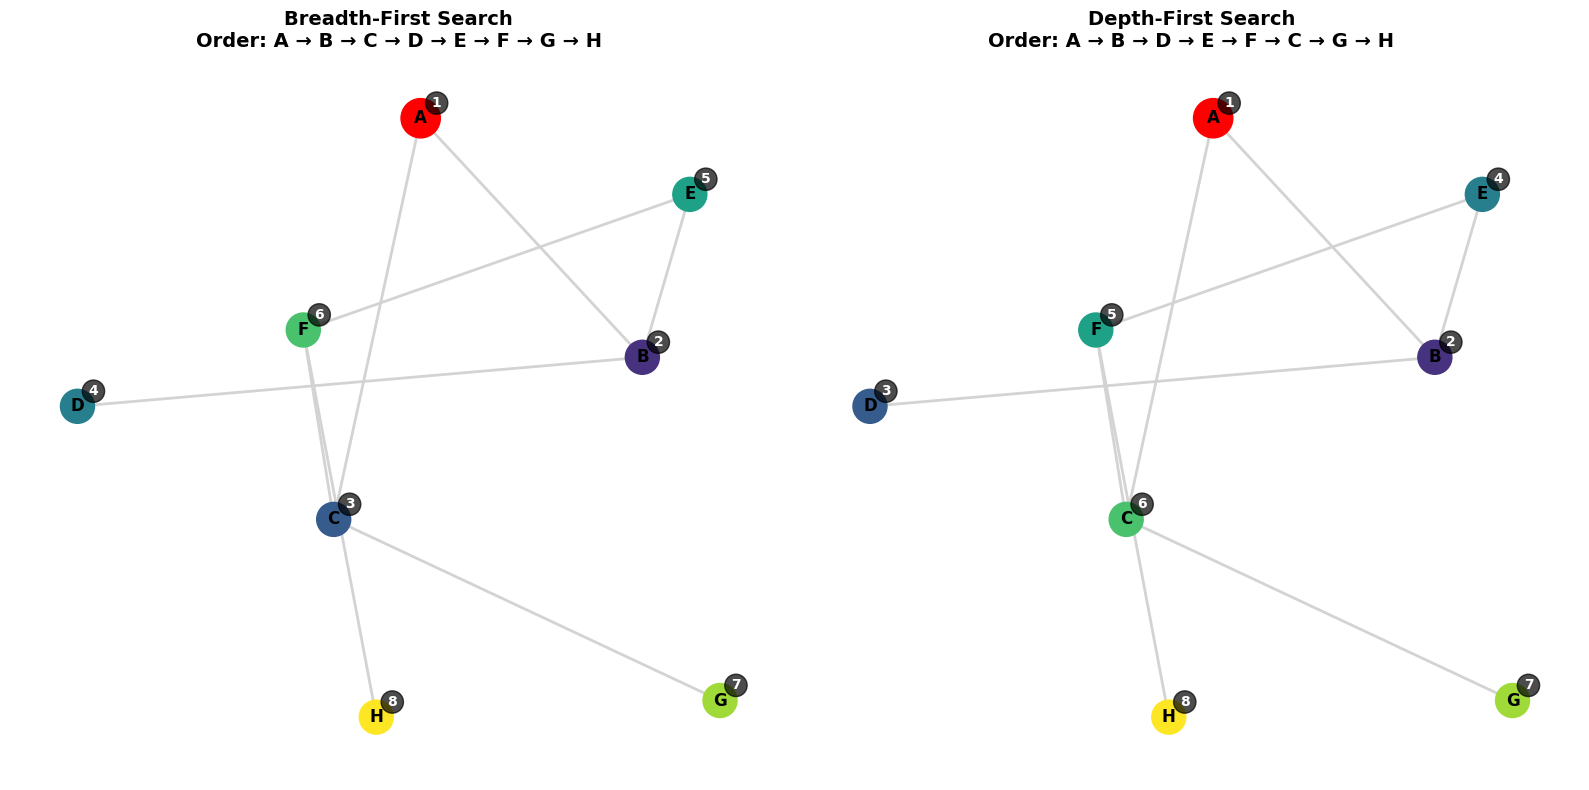

BFS Order: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
DFS Order: ['A', 'B', 'D', 'E', 'F', 'C', 'G', 'H']

Creating animated visualization...


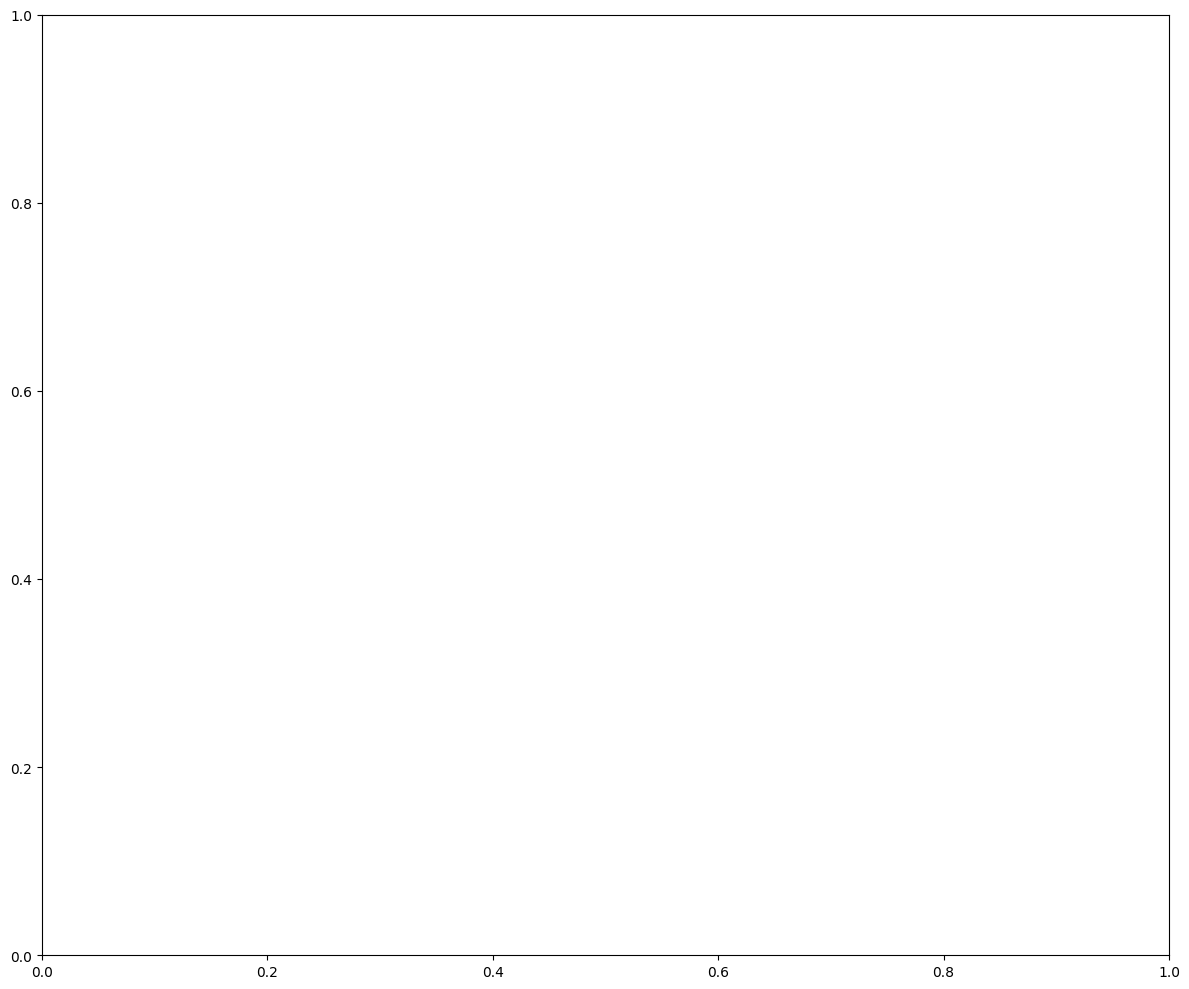

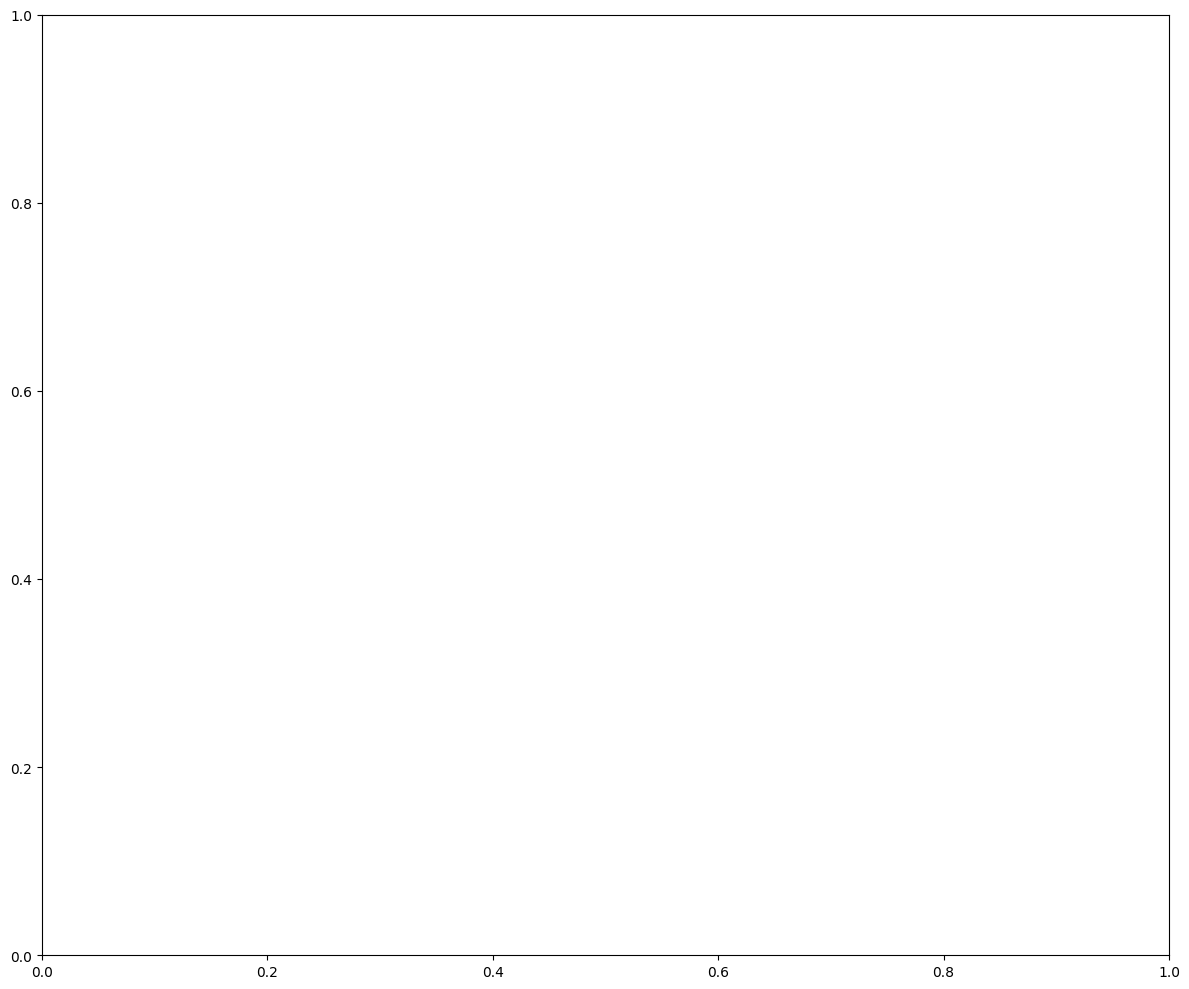


Visualizing shortest path...


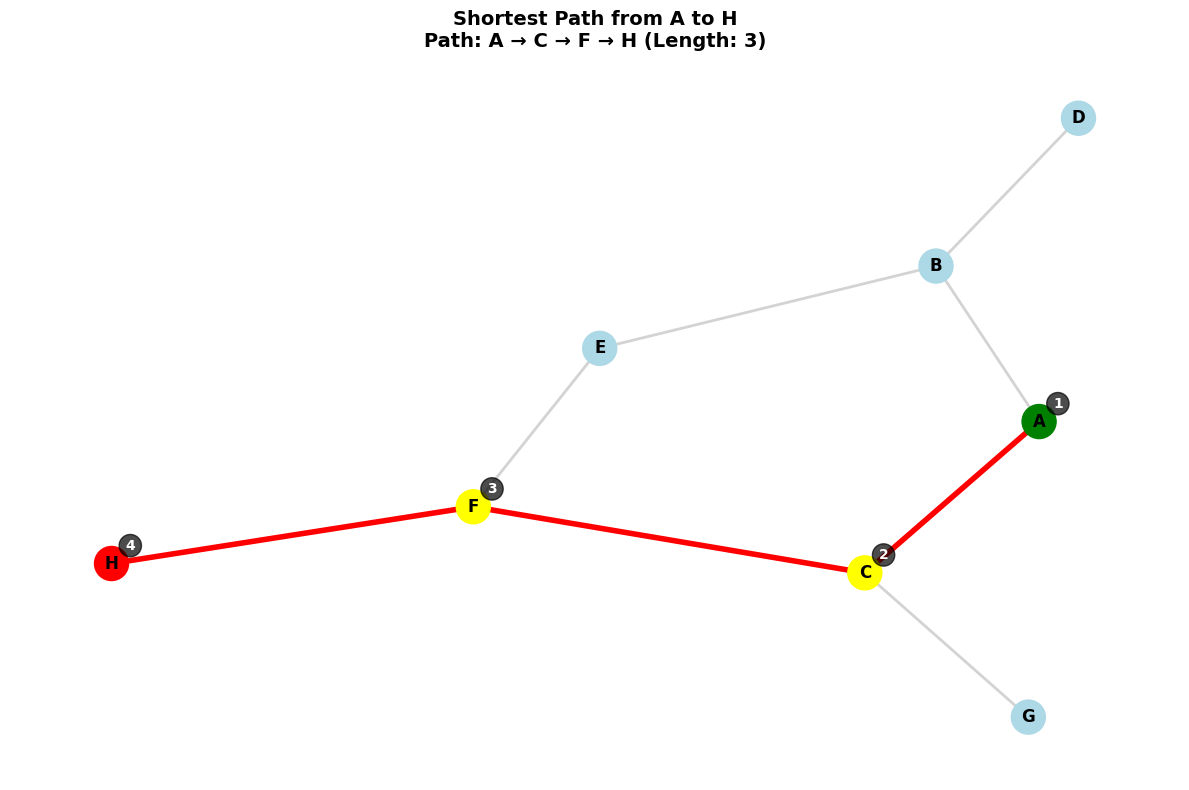

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import deque
import time
from matplotlib.animation import FuncAnimation

class GraphSearchVisualizer:
    def __init__(self, graph_dict):
        """
        Initialize the graph visualizer

        Args:
            graph_dict: Dictionary representing adjacency list
        """
        self.graph_dict = graph_dict
        self.G = nx.Graph()

        # Build NetworkX graph
        for vertex, neighbors in graph_dict.items():
            for neighbor in neighbors:
                self.G.add_edge(vertex, neighbor)

        # Set consistent layout
        self.pos = nx.spring_layout(self.G, seed=42, k=2, iterations=50)

    def bfs_with_steps(self, start):
        """BFS that returns step-by-step progression"""
        visited = set()
        queue = deque([start])
        steps = []

        visited.add(start)
        steps.append({
            'current': start,
            'visited': visited.copy(),
            'queue': list(queue),
            'action': f'Start at {start}'
        })

        while queue:
            vertex = queue.popleft()

            for neighbor in self.graph_dict.get(vertex, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    steps.append({
                        'current': neighbor,
                        'visited': visited.copy(),
                        'queue': list(queue),
                        'action': f'Discover {neighbor} from {vertex}'
                    })

        return steps

    def dfs_with_steps(self, start):
        """DFS that returns step-by-step progression"""
        visited = set()
        stack = [start]
        steps = []

        steps.append({
            'current': start,
            'visited': set(),
            'stack': [start],
            'action': f'Start at {start}'
        })

        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                steps.append({
                    'current': vertex,
                    'visited': visited.copy(),
                    'stack': stack.copy(),
                    'action': f'Visit {vertex}'
                })

                # Add neighbors in reverse order
                neighbors = list(self.graph_dict.get(vertex, []))
                for neighbor in reversed(neighbors):
                    if neighbor not in visited:
                        stack.append(neighbor)
                        steps.append({
                            'current': vertex,
                            'visited': visited.copy(),
                            'stack': stack.copy(),
                            'action': f'Add {neighbor} to stack'
                        })

        return steps

    def visualize_static_comparison(self, start):
        """Create side-by-side comparison of BFS and DFS"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        # BFS visualization
        bfs_steps = self.bfs_with_steps(start)
        bfs_order = [step['current'] for step in bfs_steps if step['current'] not in
                    [s['current'] for s in bfs_steps[:bfs_steps.index(step)]]]

        # DFS visualization
        dfs_steps = self.dfs_with_steps(start)
        dfs_order = []
        for step in dfs_steps:
            if 'Visit' in step['action'] and step['current'] not in dfs_order:
                dfs_order.append(step['current'])

        # Draw BFS
        self._draw_search_result(ax1, bfs_order, "Breadth-First Search", start)

        # Draw DFS
        self._draw_search_result(ax2, dfs_order, "Depth-First Search", start)

        plt.tight_layout()
        plt.show()

        return bfs_order, dfs_order

    def _draw_search_result(self, ax, order, title, start):
        """Helper method to draw search results"""
        # Draw edges
        nx.draw_networkx_edges(self.G, self.pos, ax=ax, edge_color='lightgray', width=2)

        # Color nodes based on visit order
        node_colors = []
        node_sizes = []

        for node in self.G.nodes():
            if node == start:
                node_colors.append('red')
                node_sizes.append(800)
            elif node in order:
                # Gradient from blue to green based on visit order
                intensity = order.index(node) / (len(order) - 1) if len(order) > 1 else 0
                color = plt.cm.viridis(intensity)
                node_colors.append(color)
                node_sizes.append(600)
            else:
                node_colors.append('lightgray')
                node_sizes.append(400)

        # Draw nodes
        nx.draw_networkx_nodes(self.G, self.pos, ax=ax,
                              node_color=node_colors, node_size=node_sizes)

        # Draw labels
        nx.draw_networkx_labels(self.G, self.pos, ax=ax, font_size=12, font_weight='bold')

        # Add visit order numbers
        for i, vertex in enumerate(order):
            x, y = self.pos[vertex]
            ax.annotate(f'{i+1}', (x, y), xytext=(8, 8), textcoords='offset points',
                       fontsize=10, color='white', weight='bold',
                       bbox=dict(boxstyle='circle', facecolor='black', alpha=0.7))

        ax.set_title(f'{title}\nOrder: {" → ".join(order)}', fontsize=14, fontweight='bold')
        ax.axis('off')

# Advanced animated visualization
class AnimatedSearchVisualizer(GraphSearchVisualizer):
    def __init__(self, graph_dict):
        super().__init__(graph_dict)
        self.fig = None
        self.ax = None

    def animate_search(self, start, algorithm='bfs', interval=1000):
        """Create animated visualization of search algorithm"""
        if algorithm == 'bfs':
            steps = self.bfs_with_steps(start)
        else:
            steps = self.dfs_with_steps(start)

        self.fig, self.ax = plt.subplots(figsize=(12, 10))

        def animate(frame):
            self.ax.clear()

            if frame < len(steps):
                step = steps[frame]
                self._draw_animated_step(step, algorithm, frame, len(steps))

            return []

        anim = FuncAnimation(self.fig, animate, frames=len(steps),
                           interval=interval, blit=False, repeat=True)

        plt.tight_layout()
        plt.show()

        return anim

    def _draw_animated_step(self, step, algorithm, frame, total_frames):
        """Draw single step of animated search"""
        # Draw edges
        nx.draw_networkx_edges(self.G, self.pos, edge_color='lightgray', width=2)

        # Color nodes based on current state
        node_colors = []
        node_sizes = []

        for node in self.G.nodes():
            if node == step['current']:
                node_colors.append('red')
                node_sizes.append(800)
            elif node in step['visited']:
                node_colors.append('lightgreen')
                node_sizes.append(600)
            elif algorithm == 'bfs' and node in step.get('queue', []):
                node_colors.append('yellow')
                node_sizes.append(500)
            elif algorithm == 'dfs' and node in step.get('stack', []):
                node_colors.append('orange')
                node_sizes.append(500)
            else:
                node_colors.append('lightgray')
                node_sizes.append(400)

        # Draw nodes
        nx.draw_networkx_nodes(self.G, self.pos, node_color=node_colors, node_size=node_sizes)
        nx.draw_networkx_labels(self.G, self.pos, font_size=12, font_weight='bold')

        # Add status information
        queue_stack_name = 'Queue' if algorithm == 'bfs' else 'Stack'
        queue_stack_content = step.get('queue' if algorithm == 'bfs' else 'stack', [])

        status_text = f"Step {frame + 1}/{total_frames}\n"
        status_text += f"Action: {step['action']}\n"
        status_text += f"Visited: {sorted(list(step['visited']))}\n"
        status_text += f"{queue_stack_name}: {queue_stack_content}"

        self.ax.text(0.02, 0.98, status_text, transform=self.ax.transAxes,
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        algorithm_name = "Breadth-First Search" if algorithm == 'bfs' else "Depth-First Search"
        self.ax.set_title(f'{algorithm_name} Animation', fontsize=16, fontweight='bold')
        self.ax.axis('off')

# Interactive visualization with path highlighting
def visualize_shortest_path(graph_dict, start, end):
    """Visualize shortest path between two vertices"""
    G = nx.Graph()
    for vertex, neighbors in graph_dict.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)

    try:
        shortest_path = nx.shortest_path(G, start, end)
        path_length = len(shortest_path) - 1
    except nx.NetworkXNoPath:
        print(f"No path exists between {start} and {end}")
        return

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))

    # Draw all edges in light gray
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=2)

    # Highlight path edges
    path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)

    # Color nodes
    node_colors = []
    for node in G.nodes():
        if node == start:
            node_colors.append('green')
        elif node == end:
            node_colors.append('red')
        elif node in shortest_path:
            node_colors.append('yellow')
        else:
            node_colors.append('lightblue')

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add path order numbers
    for i, vertex in enumerate(shortest_path):
        x, y = pos[vertex]
        plt.annotate(f'{i+1}', (x, y), xytext=(10, 10), textcoords='offset points',
                    fontsize=10, color='white', weight='bold',
                    bbox=dict(boxstyle='circle', facecolor='black', alpha=0.7))

    plt.title(f'Shortest Path from {start} to {end}\nPath: {" → ".join(shortest_path)} (Length: {path_length})',
              fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage and demonstration
if __name__ == "__main__":
    # Create example graph
    example_graph = {
        'A': ['B', 'C'],
        'B': ['A', 'D', 'E'],
        'C': ['A', 'F', 'G'],
        'D': ['B'],
        'E': ['B', 'F'],
        'F': ['C', 'E', 'H'],
        'G': ['C'],
        'H': ['F']
    }

    # Static visualization
    print("Creating static comparison...")
    visualizer = GraphSearchVisualizer(example_graph)
    bfs_order, dfs_order = visualizer.visualize_static_comparison('A')

    print(f"BFS Order: {bfs_order}")
    print(f"DFS Order: {dfs_order}")

    # Animated visualization
    print("\nCreating animated visualization...")
    animated_viz = AnimatedSearchVisualizer(example_graph)

    # Uncomment to see animations (note: animations work best in interactive environments)
    anim_bfs = animated_viz.animate_search('A', 'bfs', interval=1500)
    anim_dfs = animated_viz.animate_search('A', 'dfs', interval=1500)

    # Shortest path visualization
    print("\nVisualizing shortest path...")
    visualize_shortest_path(example_graph, 'A', 'H')


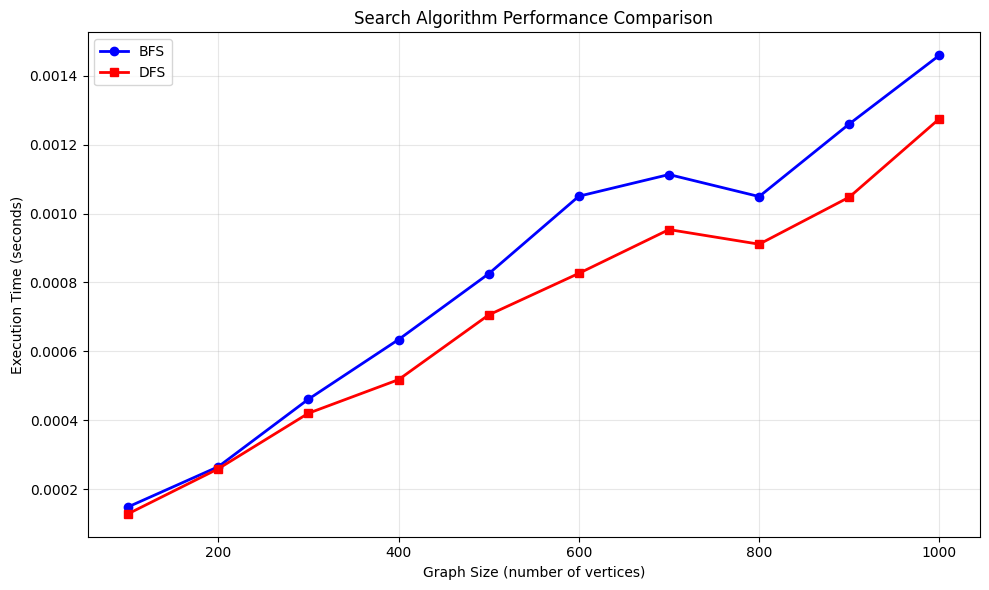

In [7]:
'''
Performance Comparison Visualization
'''

import time
import matplotlib.pyplot as plt

def benchmark_search_algorithms(max_size=1000, step=100):
    """Benchmark and visualize search algorithm performance"""
    sizes = list(range(step, max_size + 1, step))
    bfs_times = []
    dfs_times = []

    for size in sizes:
        # Create random graph
        graph = {}
        for i in range(size):
            neighbors = np.random.choice(range(size),
                                       size=min(5, size-1),
                                       replace=False)
            graph[i] = [n for n in neighbors if n != i]

        # Benchmark BFS
        start_time = time.time()
        bfs(graph, 0)
        bfs_times.append(time.time() - start_time)

        # Benchmark DFS
        start_time = time.time()
        dfs_iterative(graph, 0)
        dfs_times.append(time.time() - start_time)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, bfs_times, 'b-o', label='BFS', linewidth=2)
    plt.plot(sizes, dfs_times, 'r-s', label='DFS', linewidth=2)
    plt.xlabel('Graph Size (number of vertices)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Search Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def bfs(graph, start):
    """Simple BFS implementation for benchmarking"""
    visited = set()
    queue = deque([start])
    result = []

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            result.append(vertex)
            queue.extend(neighbor for neighbor in graph.get(vertex, [])
                        if neighbor not in visited)
    return result

def dfs_iterative(graph, start):
    """Simple DFS implementation for benchmarking"""
    visited = set()
    stack = [start]
    result = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            result.append(vertex)
            stack.extend(neighbor for neighbor in graph.get(vertex, [])
                        if neighbor not in visited)
    return result

# Run performance comparison
benchmark_search_algorithms()

